# Football Matches Predictor

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv("FB_2023 - Sheet1.csv")
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86


In [3]:
# shape of the data
df.shape

(380, 108)

In [4]:
# information on the data
df.info

<bound method DataFrame.info of     Div        Date   Time        HomeTeam       AwayTeam  \
0    E0  05/08/2022  20:00  Crystal Palace        Arsenal   
1    E0  06/08/2022  12:30          Fulham      Liverpool   
2    E0  06/08/2022  15:00     Bournemouth    Aston Villa   
3    E0  06/08/2022  15:00           Leeds         Wolves   
4    E0  06/08/2022  15:00       Newcastle  Nott'm Forest   
..   ..         ...    ...             ...            ...   
375  E0  28/05/2023  16:30         Everton    Bournemouth   
376  E0  28/05/2023  16:30           Leeds      Tottenham   
377  E0  28/05/2023  16:30       Leicester       West Ham   
378  E0  28/05/2023  16:30      Man United         Fulham   
379  E0  28/05/2023  16:30     Southampton      Liverpool   

     H_Ranking_Prior_Season  A_Ranking_Prior_Season  FTHG  FTAG FTR  ...  \
0                        12                       5     0     2   A  ...   
1                        18                       2     2     2   D  ...   
2      

In [5]:
# check missing values
df.isnull().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 108, dtype: int64

In [6]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'H_Ranking_Prior_Season',
       'A_Ranking_Prior_Season', 'FTHG', 'FTAG', 'FTR',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=108)

## Exploratory Data Analysis

In [7]:
# Keep only columns that can inform before game or during half time
df = df[['Date','Time','HomeTeam','AwayTeam','H_Ranking_Prior_Season','A_Ranking_Prior_Season','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','B365H','B365D','B365A']]

In [8]:
df.head()

,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,B365H,B365D,B365A
0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,0,1,A,A Taylor,4.20,3.6,1.85
1,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,1,0,H,A Madley,11.00,6.0,1.25
2,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,1,0,H,P Bankes,3.75,3.5,2.00
3,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,1,1,D,R Jones,2.25,3.4,3.20
4,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,0,0,D,S Hooper,1.66,3.8,5.25


In [9]:
# Shape of the data
print("Shape of the data: ", df.shape)
print("\n")

# Is there a home team advantage?
print("Full time results:")
print(df['FTR'].value_counts() / df.shape[0])

print("\n")

# Is there a home team advantage at halftime
print("Half time results:")
print(df['HTR'].value_counts() / df.shape[0])

Shape of the data:  (380, 16)


Full time results:
FTR
H    0.484211
A    0.286842
D    0.228947
Name: count, dtype: float64


Half time results:
HTR
D    0.384211
H    0.363158
A    0.252632
Name: count, dtype: float64


The purpose of finding out the percentage of games won by the home or away side was to determine whether home advantage — a phenomenon in most sports wherein the team whose ground the game is being played at often gets additional benefit due to fan support — did have a significant impact and whether it should be included as a critical feature while creating a model, and evidently as seen above it has a significant impact on the outcome of the game with the home team winning approximately 48% of the time.

In [10]:
# Confusion matrix of the full time results based on the half-time results
print("Confusion matrix, half-time to full-time")
print(pd.crosstab(df["HTR"], df['FTR'], rownames=['Half-Time'], colnames=["Full-Time"]))

Confusion matrix, half-time to full-time
Full-Time   A   D    H
Half-Time             
A          62  22   12
D          39  51   56
H           8  14  116


This shows us that half-time results are fairly predictive of full-time end results, except in the case of draws at the half, for which the final results are pretty evenly split.
1. If the half-time result was 'A' (Away win), the model correctly predicted the full-time result as 'A' for 62 matches. Similarly, for 'D' (Draw) at half-time, the model correctly predicted 'D' for 51 matches, and for 'H' (Home win) at half-time, it correctly predicted 'H' for 116 matches.

2. The exception mentioned is for draws at half-time ('D'). In this case, the model is less accurate. For example, when the half-time result was a draw, it correctly predicted 'D' for 51 matches, but it incorrectly predicted 'A' for 39 matches and 'H' for 56 matches.

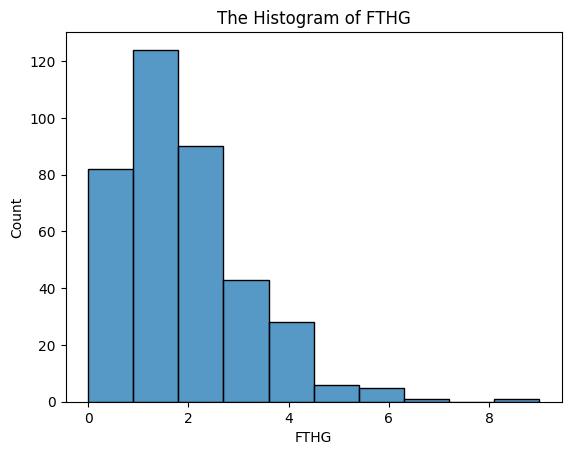

In [11]:
# Histogram of full-time home team goals
sns.histplot(x=df['FTHG'], bins=10)
plt.title("The Histogram of {}".format("FTHG"))
plt.show()

The home team is most likely to score 0 to 3 goals at full time.

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_10596\1227146479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half_time_GD'] = df['HTHG'] - df['HTAG']


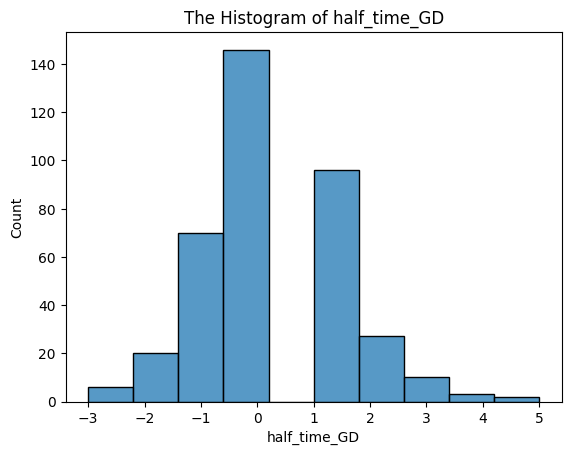

In [12]:
# Variable creation (Point difference at half: Home goals - Away Goals)
df['half_time_GD'] = df['HTHG'] - df['HTAG']

# How predictive the goal difference is of the final outocome
sns.histplot(x=df['half_time_GD'], bins=10)
plt.title("The Histogram of {}".format("half_time_GD"))
plt.show()

The goal difference is most likely to be zero at half time.

In [13]:
print('Confusion matrix, half-time goal difference compared to full-time match result')
print(pd.crosstab(df['half_time_GD'], df['FTR'], rownames=['Half-Time Goal Difference (Home - Away)'], colnames=['Full-Time']))

Confusion matrix, half-time goal difference compared to full-time match result
Full-Time                                 A   D   H
Half-Time Goal Difference (Home - Away)            
-3                                        6   0   0
-2                                       17   1   2
-1                                       39  21  10
 0                                       39  51  56
 1                                        7  14  75
 2                                        1   0  26
 3                                        0   0  10
 4                                        0   0   3
 5                                        0   0   2


### Interpretation:
1. Negative Goal Differences:
For matches where the home team was trailing by 3 goals at half-time, the model correctly predicted an Away win (A) for 6 matches.
For matches where the home team was trailing by 2 goals at half-time, the model correctly predicted Away wins (A) for 17 matches, and Draws (D) for 1 match.

2. Close or Tied at Half-Time (Goal Difference 0 or 1):
For matches where the goal difference was 0 at half-time, the model correctly predicted Away wins (A) for 39 matches, Draws (D) for 51 matches, and Home wins (H) for 56 matches.
For matches where the home team was leading by 1 goal at half-time, the model correctly predicted Away wins (A) for 7 matches, Draws (D) for 14 matches, and Home wins (H) for 75 matches.

3. Positive Goal Differences:
For matches where the home team was leading by 2 goals at half-time, the model correctly predicted Away wins (A) for 1 match and Home wins (H) for 26 matches.
For matches where the home team was leading by 3 goals at half-time, the model correctly predicted Home wins (H) for 10 matches.
For matches with a goal difference of 4 or 5 at half-time, the model correctly predicted Home wins (H) for 3 and 2 matches, respectively.

In [14]:
df.head()

,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,B365H,B365D,B365A,half_time_GD
0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,0,1,A,A Taylor,4.20,3.6,1.85,-1
1,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,1,0,H,A Madley,11.00,6.0,1.25,1
2,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,1,0,H,P Bankes,3.75,3.5,2.00,1
3,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,1,1,D,R Jones,2.25,3.4,3.20,0
4,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,0,0,D,S Hooper,1.66,3.8,5.25,0


Text(0, 0.5, 'Home team goals (full time)')

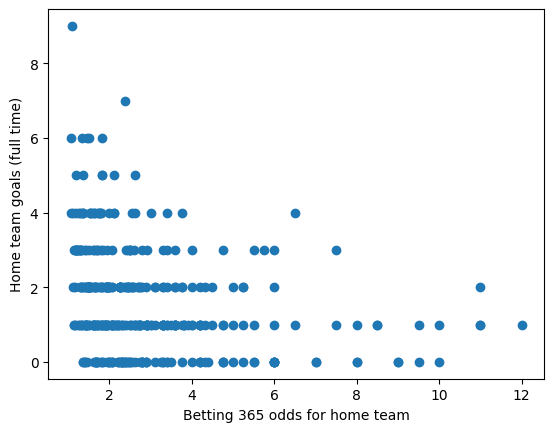

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = df['B365H'], y = df['FTHG'])
ax.set_xlabel('Betting 365 odds for home team')
ax.set_ylabel('Home team goals (full time)')

There is no significant correlation between these two varibles but some trend is evident.

C:\Users\CHARLES\AppData\Local\Temp\ipykernel_10596\3652049629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_time_GD'] = df['FTHG'] - df['FTAG']


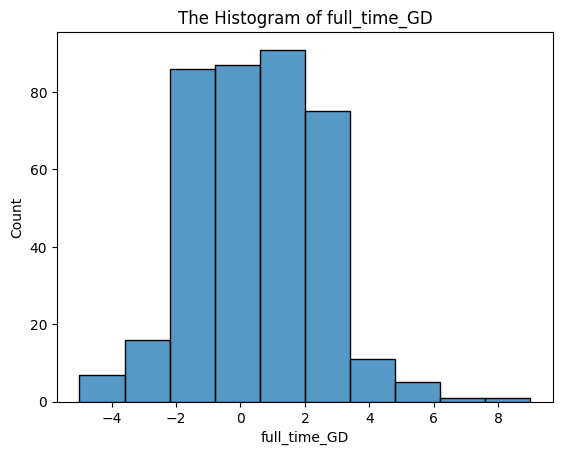

In [16]:
# Variable creation (point difference at full tim: Home Goals - Away Goals)
df['full_time_GD'] = df['FTHG'] - df['FTAG']

# How predictive the goal difference is of final outcome
sns.histplot(x=df['full_time_GD'], bins=10)
plt.title("The Histogram of {}".format("full_time_GD"))
plt.show()

The goal difference lies between -2 and 3 at full time.

Text(0, 0.5, 'Full time goal difference (home - away)')

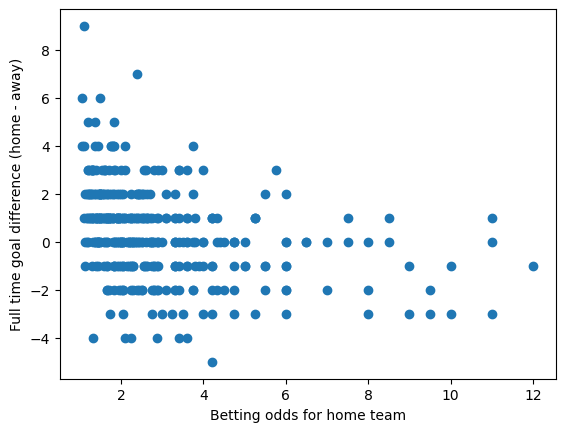

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = df['B365H'], y = df['full_time_GD'])
ax.set_xlabel('Betting odds for home team')
ax.set_ylabel('Full time goal difference (home - away)')

Text(0, 0.5, 'Full time goal difference (home - away)')

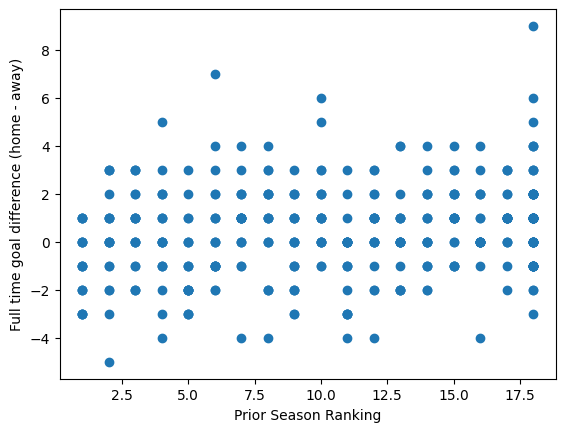

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = df['A_Ranking_Prior_Season'], y = df['full_time_GD'])
ax.set_xlabel('Prior Season Ranking')
ax.set_ylabel('Full time goal difference (home - away)')

## The Target and Predictor Variables

In [19]:
X = df.drop(columns = ['Date', 'Time', 'Referee', 'FTR', 'FTHG', 'FTAG', 'full_time_GD'])
y = df['FTR'] # target variable (winning team)

## One-Hot Encoding

In [20]:
# Function to one-hot encode categorical variables
def encode_and_bind(original_dataframe, feature_to_encode):
    """
    Function for one-hot encoding, takes dataframe and features to encode
    returns one-hot encoded dataframe
    """
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    dummies = dummies.astype(int)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)


# features to one-hot encode
features_to_encode = ['HomeTeam', 'AwayTeam']

for feature in features_to_encode:
    X = encode_and_bind(X, feature)

# one-hot encoding results
X.head()

,H_Ranking_Prior_Season,A_Ranking_Prior_Season,HTHG,HTAG,HTR,B365H,B365D,B365A,half_time_GD,HomeTeam_Arsenal,...,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves
0,12,5,0,1,A,4.20,3.6,1.85,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,18,2,1,0,H,11.00,6.0,1.25,1,0,...,0,1,0,0,0,0,0,0,0,0
2,18,14,1,0,H,3.75,3.5,2.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,17,10,1,1,D,2.25,3.4,3.20,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11,18,0,0,D,1.66,3.8,5.25,0,0,...,0,0,0,0,0,1,0,0,0,0


## Data Splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (266, 49)
X_test shape: (114, 49)
y_train shape: (266,)
y_test shape: (114,)


## Model Building

### i) Baseline Model

In [23]:
## Baseline model
### Using half time results to predict full time (e.g. if half time winning, then predict full time winning)

# make predictions
y_pred_train = X_train['HTR']
y_pred_test = X_test['HTR']

In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy on Train data: ", round(accuracy_score(y_pred_train, y_train), 3))
print("Accuracy on Test data: ", round(accuracy_score(y_pred_test, y_test), 3))

Accuracy on Train data:  0.594
Accuracy on Test data:  0.623


### ii) Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
features_to_encode = ["HTR"]

for feature in features_to_encode:
    X_train = encode_and_bind(X_train, feature)

for feature in features_to_encode:
    X_test = encode_and_bind(X_test, feature)

# one-hot encoding results
X_train.head()

,H_Ranking_Prior_Season,A_Ranking_Prior_Season,HTHG,HTAG,B365H,B365D,B365A,half_time_GD,HomeTeam_Arsenal,HomeTeam_Aston Villa,...,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves,HTR_A,HTR_D,HTR_H
170,6,18,1,0,1.29,5.50,11.00,1,0,0,...,0,0,0,0,0,0,0,0,0,1
308,13,14,0,0,2.50,3.25,2.88,0,0,0,...,0,0,0,0,0,0,0,0,1,0
212,12,9,0,0,3.80,3.50,2.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,18,7,1,0,4.20,3.60,1.85,1,0,0,...,0,0,0,0,0,1,0,0,0,1
234,8,5,0,0,4.75,4.00,1.70,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
print('Logistic regression accuracy on train set: ', round(logit.score(X_train,y_train),3))
print('Logistic regression accuracy on test set: ', round(logit.score(X_test,y_test),3))

Logistic regression accuracy on train set:  0.718
Logistic regression accuracy on test set:  0.579


We see evidence of overfitting since the model performs better on the training set but poorly on the testing set.

#### Hyperparameter tuning

In [33]:
# storage parameters
train_accuracies = []
test_accuracies = []
c_vals = np.logspace(-7, -2.5, num=100) # penalty parameters to test

# Hyperparameter tuning for loop
for c_val in c_vals:
    # fit model on training data
    logit_tuned = LogisticRegression(penalty = 'l2', C = c_val)
    logit_tuned.fit(X_train, y_train)
    
    # store train and test accuracies
    train_accuracies.append(logit_tuned.score(X_train,y_train))
    test_accuracies.append(logit_tuned.score(X_test,y_test))

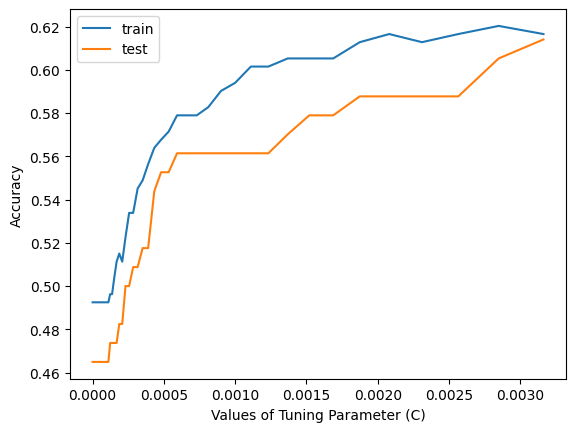

In [35]:
# plot train and test accuracies
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(c_vals, train_accuracies, label = 'train')
ax.plot(c_vals, test_accuracies, label = 'test')
ax.set_xlabel("Values of Tuning Parameter (C)")
ax.set_ylabel("Accuracy")
ax.legend(loc = 'best')

In [36]:
## Determining maximizing C on test set
print('Maximum test accuracy: ', np.round(test_accuracies[np.argmax(test_accuracies)], 3))
print('Value of C that achieves max test accuracy: ', np.round(c_vals[np.argmax(test_accuracies)],5))

Maximum test accuracy:  0.614
Value of C that achieves max test accuracy:  0.00316


### iii) Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.627\nsamples = 266\nvalue = [75, 60, 131]'),
 Text(0.25, 0.5, 'x[4] <= 1.975\ngini = 0.656\nsamples = 169\nvalue = [70, 52, 47]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[5] <= 3.45\ngini = 0.241\nsamples = 97\nvalue = [5, 8, 84]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

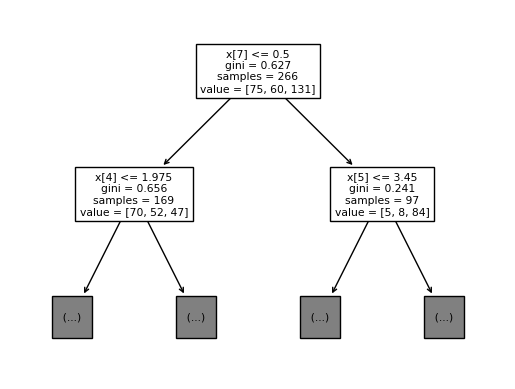

In [40]:
import sklearn
sklearn.tree.plot_tree(dt, max_depth=1)

In [41]:
print("Decision Tree accuracy on train set: ", round(dt.score(X_train, y_train), 3))
print("Decision Tree accuracy on test set: ", round(dt.score(X_test, y_test), 3))

Decision Tree accuracy on train set:  1.0
Decision Tree accuracy on test set:  0.474


 There is overfitting.

In [42]:
# storage variables
train_accuracies = []
test_accuracies = []
min_vals = np.linspace(0.001, 1, num = 500) # Penalty parameters to test

# Hyperparameter tuning for loop
for min_val in min_vals:
    
    # Fit model on training data
    dt_tuned = DecisionTreeClassifier(min_samples_split = min_val)
    dt_tuned.fit(X_train, y_train)
    
    # Store training and test accuracies
    train_accuracies.append(dt_tuned.score(X_train,y_train))
    test_accuracies.append(dt_tuned.score(X_test,y_test))

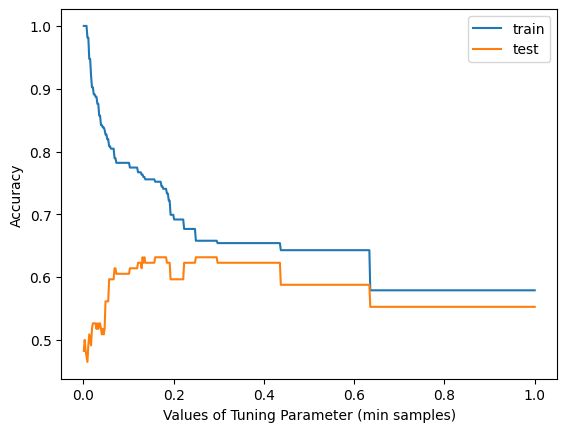

In [43]:
# plot train and test accuracies
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(min_vals, train_accuracies, label = 'train')
ax.plot(min_vals, test_accuracies, label = 'test')
ax.set_xlabel('Values of Tuning Parameter (min samples)')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'best')

In [45]:
print("Maximum test accuracy: ", np.round(test_accuracies[np.argmax(test_accuracies)], 3))
print('Value of min samples that achieved the max test accuracy: ', np.round(min_vals[np.argmax(test_accuracies)],5))

Maximum test accuracy:  0.632
Value of min samples that achieved the max test accuracy:  0.13113


### iv) Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Random forest accuracy on train set: ', round(rf.score(X_train,y_train),3))
print('Random Forest accuracy on test set: ', round(rf.score(X_test,y_test),3))

Random forest accuracy on train set:  1.0
Random Forest accuracy on test set:  0.596


In [47]:
# storage variables
train_accuracies = []
test_accuracies = []
min_vals = np.linspace(0.001, 1, num = 10) # Penalty parameters to test
nTrees = np.arange(1,1000,step=200)

# Hyperparameter tuning for loop
for min_val in min_vals:
    for nTree in nTrees:
        # Fit model on Training data
        forest_tuned = RandomForestClassifier(min_samples_split = min_val, n_estimators = nTree)
        forest_tuned.fit(X_train, y_train)
        
        # Store training and test accuracies
        train_accuracies.append(forest_tuned.score(X_train,y_train))
        test_accuracies.append(forest_tuned.score(X_test,y_test))

In [48]:
print('Maximum test accuracy: ', np.round(test_accuracies[np.argmax(test_accuracies)], 3))
print('Value of min samples that achieves max test accuracy: ', np.round(min_vals[round(np.argmax(test_accuracies)/1000)],5))
print('Value of min trees that achieves max test accuracy: ', np.round(nTrees[1],5))

Maximum test accuracy:  0.649
Value of min samples that achieves max test accuracy:  0.001
Value of min trees that achieves max test accuracy:  201


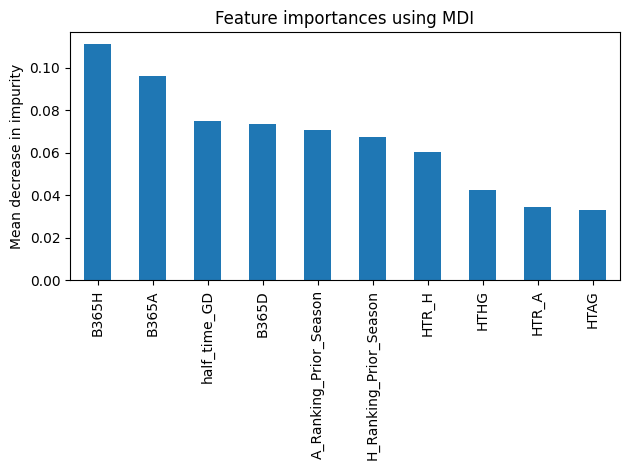

In [50]:
# Get random forest feature importances

importances = rf.feature_importances_
feature_names = X_train.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances[forest_importances > 0.02].sort_values(ascending = False).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Based on the results, we can successfully conclude that the Random Forests Model gives us the most accurate predictions.

#### Predicting a Single Instance

In [62]:
# Creating a single-row DataFrame with actual values
single_instance_df = pd.DataFrame({
    'H_Ranking_Prior_Season': [8],
    'A_Ranking_Prior_Season': [1],
    'HTHG': [0],
    'HTAG': [2],
    'B365H': [1.8],
    'B365D': [3.2],
    'B365A': [4.5],
    'half_time_GD': [-2],
    'HomeTeam_Arsenal': [0],
    'HomeTeam_Aston Villa': [0],
    'HomeTeam_Bournemouth': [0],
    'HomeTeam_Brentford': [0],
    'HomeTeam_Brighton': [0],
    'HomeTeam_Chelsea': [0],
    'HomeTeam_Crystal Palace': [1],
    'HomeTeam_Everton': [0],
    'HomeTeam_Fulham': [0],
    'HomeTeam_Leeds': [0],
    'HomeTeam_Leicester': [0],
    'HomeTeam_Liverpool': [0],
    'HomeTeam_Man City': [0],
    'HomeTeam_Man United': [0],
    'HomeTeam_Newcastle': [0],
    'HomeTeam_Nott\'m Forest': [0],
    'HomeTeam_Southampton': [0],
    'HomeTeam_Tottenham': [0],
    'HomeTeam_West Ham': [0],
    'HomeTeam_Wolves': [0],
    'AwayTeam_Arsenal': [0],
    'AwayTeam_Aston Villa': [0],
    'AwayTeam_Bournemouth': [0],
    'AwayTeam_Brentford': [0],
    'AwayTeam_Brighton': [0],
    'AwayTeam_Chelsea': [0],
    'AwayTeam_Crystal Palace': [0],
    'AwayTeam_Everton': [0],
    'AwayTeam_Fulham': [0],
    'AwayTeam_Leeds': [0],
    'AwayTeam_Leicester': [0],
    'AwayTeam_Liverpool': [1],
    'AwayTeam_Man City': [0],
    'AwayTeam_Man United': [0],
    'AwayTeam_Newcastle': [0],
    'AwayTeam_Nott\'m Forest': [0],
    'AwayTeam_Southampton': [0],
    'AwayTeam_Tottenham': [0],
    'AwayTeam_West Ham': [0],
    'AwayTeam_Wolves': [0],
    'HTR_A': [0],
    'HTR_D': [1],
    'HTR_H': [0]
})

# Use the trained model to predict the outcome for the single instance
prediction = forest_tuned.predict(single_instance_df)

# Print the predicted outcome
print("Predicted Outcome:", prediction)

Predicted Outcome: ['H']
